# WEEK 5

## TOP COHORTS

In [1]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("preprocessed_kids_screen_time.csv")
df.head(7)

,Age,Age_group,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Device_Type,Screen_Size,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Health_Status,Urban_or_Rural
0,14,Teenagers,Male,3.99,Smartphone,Portable,<30,True,0.42,"Poor Sleep, Eye Strain","Mental, Physical",Urban
1,11,Pre-Teens,Female,4.61,Laptop,Portable,<30,True,0.30,Poor Sleep,Mental,Urban
2,18,Late Teens,Female,3.73,TV,Fixed,>=30,True,0.32,Poor Sleep,Mental,Urban
3,15,Teenagers,Female,1.21,Laptop,Portable,<30,False,0.39,No Health Impacts,No Health Impacts,Urban
4,12,Pre-Teens,Female,5.89,Smartphone,Portable,<30,True,0.49,"Poor Sleep, Anxiety",Mental,Urban
5,14,Teenagers,Female,4.88,Smartphone,Portable,<30,True,0.44,Poor Sleep,Mental,Urban
6,17,Late Teens,Male,2.97,TV,Fixed,>=30,False,0.48,No Health Impacts,No Health Impacts,Rural


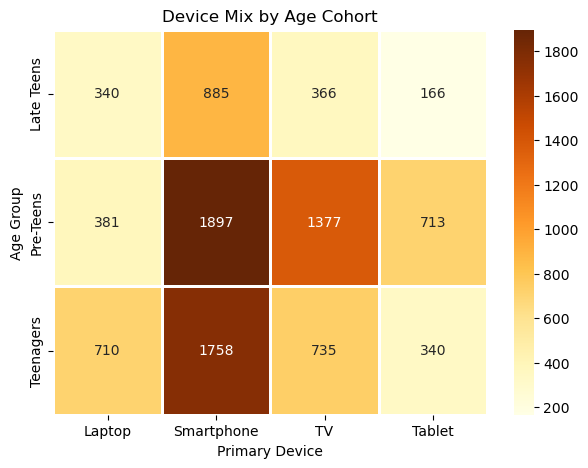

In [2]:
#  Heatmap - Age_group × Primary_Device
ct = pd.crosstab(df["Age_group"], df["Primary_Device"])

plt.figure(figsize=(7,5))
sns.heatmap(
    ct,
    annot=True,         
    fmt="d",            
    cmap="YlOrBr",     
    linewidths=1,       
    linecolor="white",  
    cbar=True           
)

plt.title("Device Mix by Age Cohort")
plt.xlabel("Primary Device")
plt.ylabel("Age Group")
plt.show()

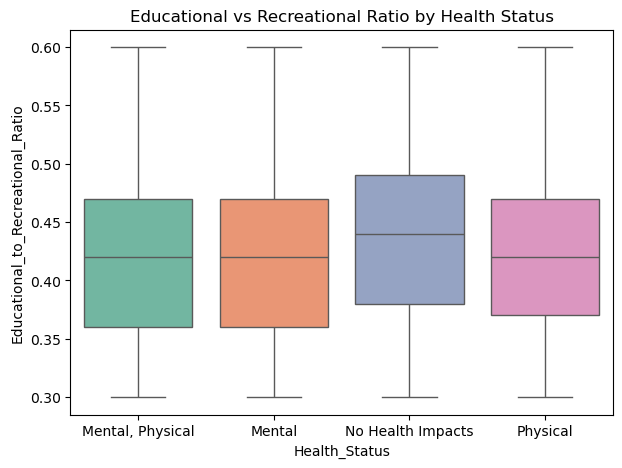

In [4]:
# Boxplot - Health_Status vs Edu/Recreational Ratio
plt.figure(figsize=(7,5))
sns.boxplot(
    x="Health_Status", 
    y="Educational_to_Recreational_Ratio", 
    hue="Health_Status",        
    data=df, 
    palette="Set2",               
)
plt.title("Educational vs Recreational Ratio by Health Status")
plt.show()

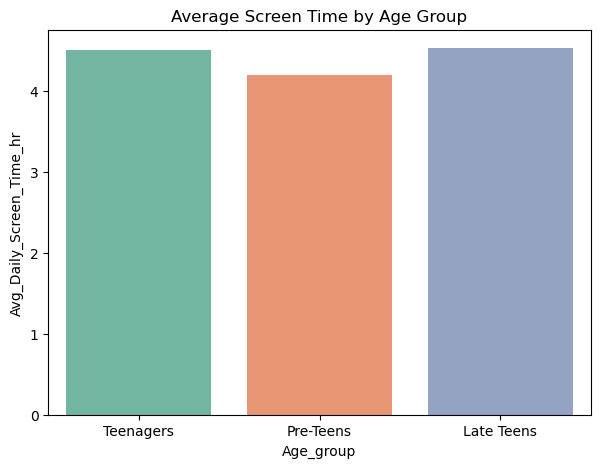

In [9]:
# countplot-Average Screen Time by Age Group
plt.figure(figsize=(7,5))
sns.barplot(
    x="Age_group", 
    y="Avg_Daily_Screen_Time_hr", 
    data=df, 
    palette="Set2", 
    hue ="Age_group",
    errorbar=None
)

plt.title("Average Screen Time by Age Group")
plt.show()

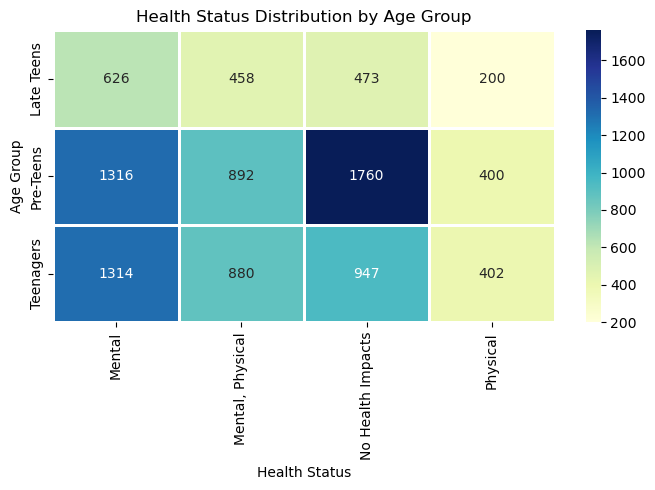

In [5]:
# Heatmap - Age_group × Health_Status
ct = pd.crosstab(df["Age_group"], df["Health_Status"])

plt.figure(figsize=(7,5))
sns.heatmap(
    ct,
    annot=True,         
    fmt="d",            
    cmap="YlGnBu",      
    linewidths=1,       
    linecolor="white",  
    cbar=True           
)

plt.title("Health Status Distribution by Age Group")
plt.xlabel("Health Status")
plt.ylabel("Age Group")
plt.tight_layout()
plt.show()

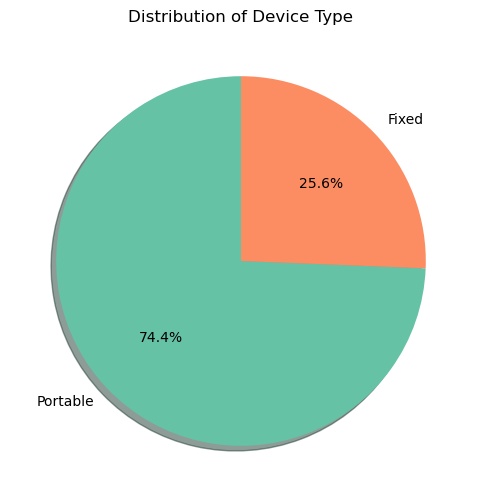

In [6]:
# Pie chart-Distribution of Device Type
plt.figure(figsize=(6,6))
df['Device_Type'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    shadow=True,
    colors=["#66c2a5", "#fc8d62"] 
)

plt.ylabel("")
plt.title("Distribution of Device Type")
plt.show()

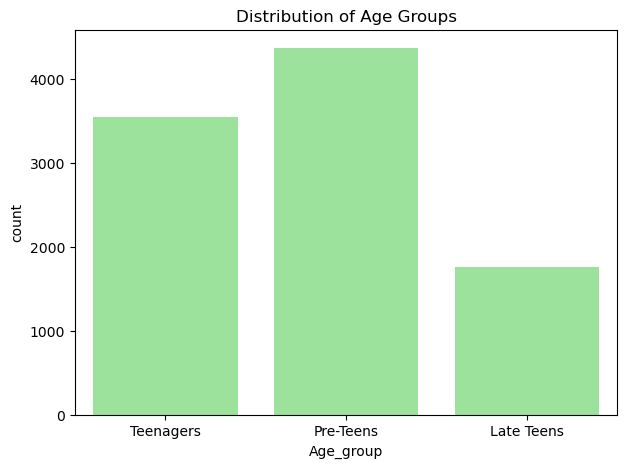

In [7]:
# Countplot - Age_group distribution
plt.figure(figsize=(7,5))
sns.countplot(x="Age_group", data=df, color="lightgreen")  
plt.title("Distribution of Age Groups")
plt.show()

## Heatmaps & stacked comparisons by demographics/location

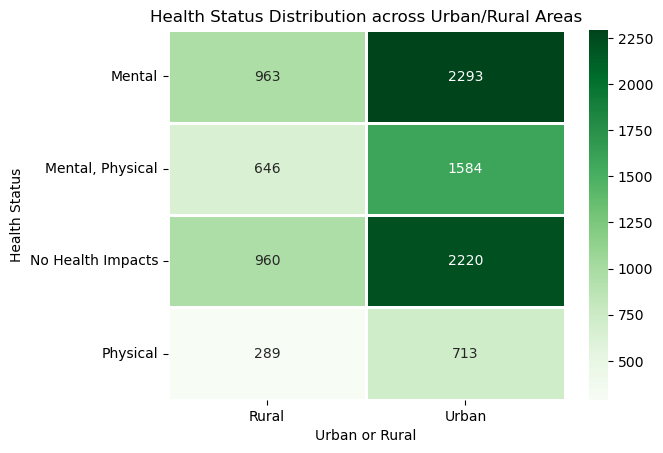

In [8]:
# Heatmap-Health Status Distribution 
ct = pd.crosstab(df["Health_Status"], df["Urban_or_Rural"])
sns.heatmap(ct, annot=True, fmt="d", cmap="Greens", linewidths=1, linecolor="white")
plt.title("Health Status Distribution across Urban/Rural Areas")
plt.xlabel("Urban or Rural")
plt.ylabel("Health Status")
plt.show()

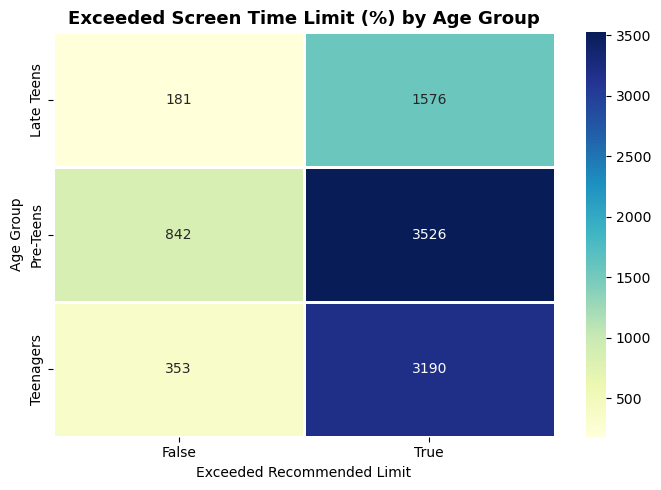

In [10]:
# Heatmap - Exceeded Limit % by Age Group
ct = pd.crosstab(df["Age_group"], df[ "Exceeded_Recommended_Limit"])

plt.figure(figsize=(7,5))
sns.heatmap(
    ct,
    annot=True,         
    fmt="d",            
    cmap="YlGnBu",      
    linewidths=1,       
    linecolor="white",  
    cbar=True           
)

plt.title("Exceeded Screen Time Limit (%) by Age Group", fontsize=13, weight='bold')
plt.xlabel("Exceeded Recommended Limit")
plt.ylabel("Age Group")
plt.tight_layout()
plt.show()

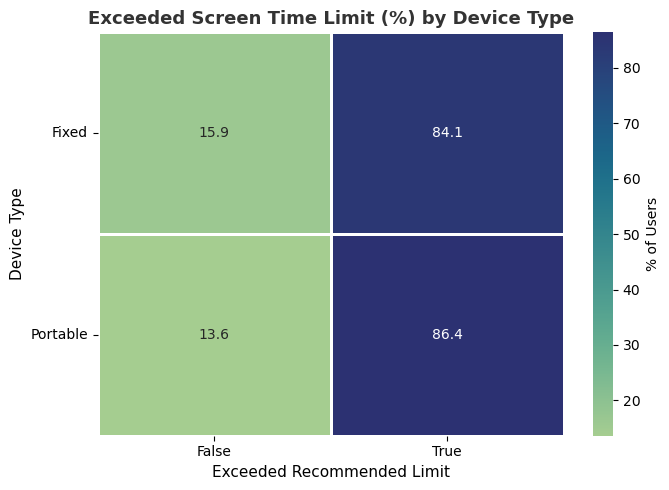

In [18]:
# Heatmap - % of Exceeded Screen Time Limit by Device Type

ct = pd.crosstab(
    df["Device_Type"],
    df["Exceeded_Recommended_Limit"],
    normalize='index'
) * 100

plt.figure(figsize=(7,5))
sns.heatmap(
    ct,
    annot=True,
    fmt=".1f",
    cmap="crest",        
    linewidths=1,
    linecolor="white",
    cbar_kws={'label': '% of Users'}
)

plt.title("Exceeded Screen Time Limit (%) by Device Type", fontsize=13, weight='bold', color="#333333")
plt.xlabel("Exceeded Recommended Limit", fontsize=11)
plt.ylabel("Device Type", fontsize=11)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

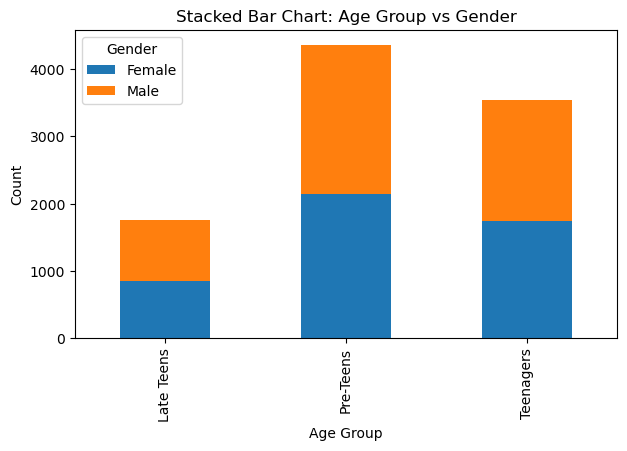

In [14]:
# STACKED BAR CHART  – Age group vs Gender
age_gender = pd.crosstab(df['Age_group'], df['Gender'])
age_gender.plot(kind='bar', stacked=True, figsize=(7,4))
plt.title("Stacked Bar Chart: Age Group vs Gender")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title="Gender")
plt.show()

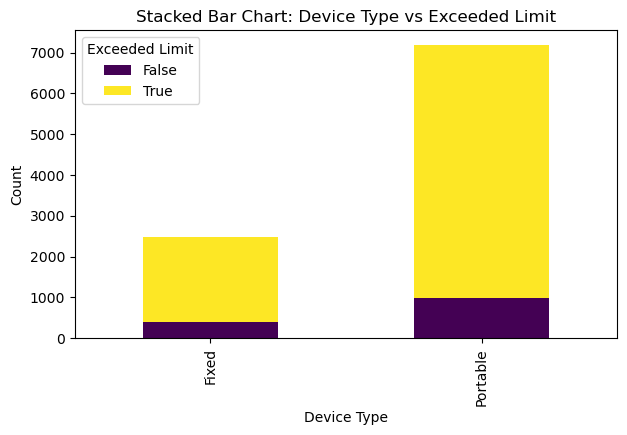

In [15]:
# STACKED BAR CHART  – Device Type vs Exceeded Recommended Limit
device_limit = pd.crosstab(df['Device_Type'], df['Exceeded_Recommended_Limit'])
device_limit.plot(kind='bar', stacked=True, figsize=(7,4), colormap='viridis')
plt.title("Stacked Bar Chart: Device Type vs Exceeded Limit")
plt.xlabel("Device Type")
plt.ylabel("Count")
plt.legend(title="Exceeded Limit")
plt.show()

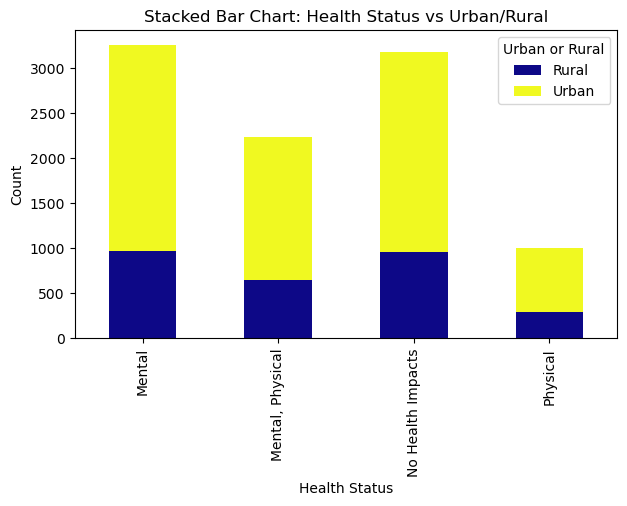

In [16]:
# STACKED BAR CHART – Health Status vs Urban_or_Rural
health_urban = pd.crosstab(df['Health_Status'], df['Urban_or_Rural'])
health_urban.plot(kind='bar', stacked=True, figsize=(7,4), colormap='plasma')
plt.title("Stacked Bar Chart: Health Status vs Urban/Rural")
plt.xlabel("Health Status")
plt.ylabel("Count")
plt.legend(title="Urban or Rural")
plt.show()